##Import Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten, MaxPooling2D, Dropout, Activation, Convolution2D, BatchNormalization
from tensorflow.keras.models import Sequential

In [ ]:
#Rotate IMG
import cv2
def rotateImg(img, angle):
    # Load the image
    #img = cv2.imread('image.jpg')

    # Get the image center
    h, w = img.shape[:2]
    center = (w // 2, h // 2)

    # Define the rotation angle
    #angle = 45

    # Calculate the rotation matrix
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Apply the rotation to the image
    rotated = cv2.warpAffine(img, M, (w, h))

    # Display the original and rotated images
    #cv2.imshow('Original Image', img)
    #cv2.imshow('Rotated Image', rotated)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()

    return (rotated)

##Load Kaggle dataset

In [ ]:
#Load data frpm kaggle
from google.colab import files
files.upload()

%pip install -q kaggle
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list
!kaggle datasets download paultimothymooney/breast-histopathology-images --unzip



Saving kaggle.json to kaggle.json
rm: cannot remove '/root/.kaggle': No such file or directory
ref                                                      title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide     Covid Cases and Deaths WorldWide           8KB  2023-02-01 12:22:51          11664        384  1.0              
naveenkumar20bps1137/walmart-sales-analysis              WALMART SALES ANALYSIS                   119KB  2023-03-03 18:02:11           2002         54  0.9411765        
datascientistanna/customers-dataset                      Shop Customer Data                        23KB  2023-02-07 18:42:21          10040        227  1.0              
ulrikthygepedersen/co2-emissions-by-country            

In [ ]:
%ls


10253/  10305/  12881/  13018/  14153/  16085/  8980/  9255/
10254/  10306/  12882/  13019/  14154/  16165/  8984/  9256/
10255/  10307/  12883/  13020/  14155/  16166/  9022/  9257/
10256/  10308/  12884/  13021/  14156/  16167/  9023/  9258/
10257/  12241/  12886/  13022/  14157/  16531/  9029/  9259/
10258/  12242/  12890/  13023/  14188/  16532/  9035/  9260/
10259/  12626/  12891/  13024/  14189/  16533/  9036/  9261/
10260/  12748/  12892/  13025/  14190/  16534/  9037/  9262/
10261/  12749/  12893/  13106/  14191/  16550/  9041/  9265/
10262/  12750/  12894/  13400/  14192/  16551/  9043/  9266/
10264/  12751/  12895/  13401/  14209/  16552/  9044/  9267/
10268/  12752/  12896/  13402/  14210/  16553/  9073/  9290/
10269/  12810/  12897/  13403/  14211/  16554/  9075/  9291/
10272/  12811/  12898/  13404/  14212/  16555/  9076/  9319/
10273/  12817/  12900/  13458/  14213/  16568/  9077/  9320/
10274/  12818/  12901/  13459/  14304/  16569/  9078/  9321/
10275/  12819/  12905/  

##Read Images into two classes

In [ ]:
import glob
dir = glob.glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive = True)
N_IDC = []
P_IDC = []

for img in dir:
    if img[-5] == '0' :
        N_IDC.append(img)

    elif img[-5] == '1' :
        P_IDC.append(img)


##Plot Sample Images

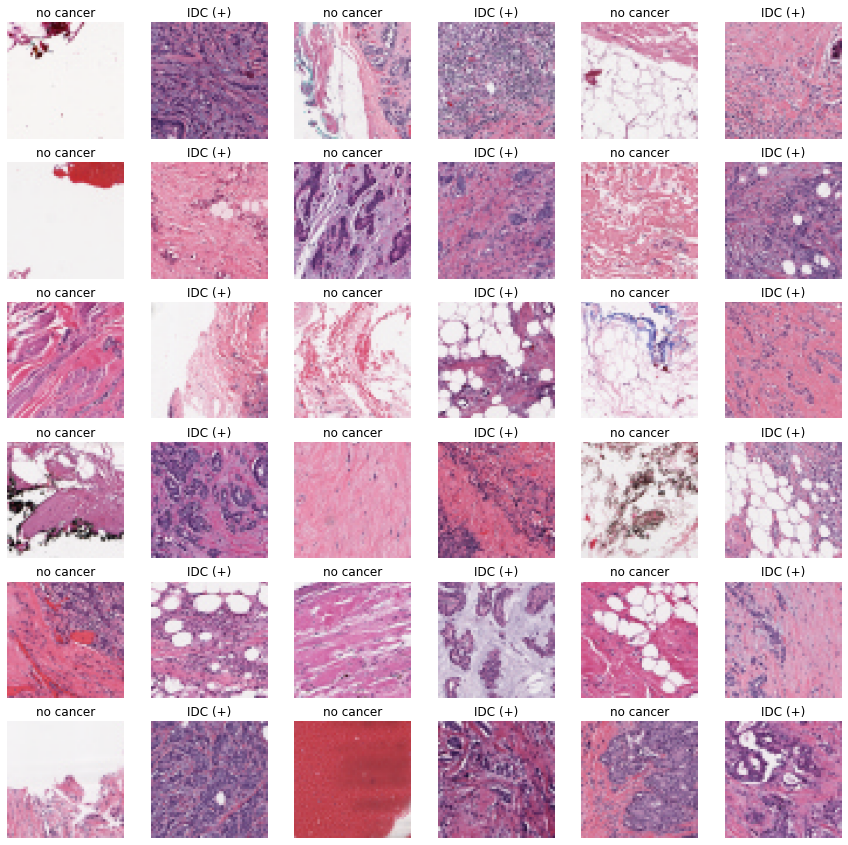

In [ ]:
from keras.preprocessing import image

plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(N_IDC), 18)
some_can = np.random.randint(0, len(P_IDC), 18)

s = 0
for num in some_non:

        img = tf.keras.utils.load_img((N_IDC[num]), target_size=(100, 100))
        img = tf.keras.utils.img_to_array(img)

        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
s = 1

for num in some_can:

        img = tf.keras.utils.load_img((P_IDC[num]), target_size=(100, 100))
        img = tf.keras.utils.img_to_array(img)

        plt.subplot(6, 6, 2*s)
        plt.axis('off')
        plt.title('IDC (+)')
        plt.imshow(img.astype('uint8'))
        s += 1

##Images Handling

In [ ]:
import cv2
import random

print('Total number of images before Augmentation:')
print('Number of IDC(-) Images: ', len (N_IDC))
print('Number of IDC(+) Images: ', len (P_IDC))


non_img_arr = []
can_img_arr = []

for img in N_IDC:

    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (32, 32), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])

for img in P_IDC:
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (32, 32), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])


    #flip images
    flippedImage = cv2.flip(c_img_size, 0)
    can_img_arr.append([flippedImage, 1])

    #rotate images
    rotateImage=rotateImg(c_img_size,45)
    can_img_arr.append([rotateImage, 1])
print('Total number of images after Augmentation: ')
print('Number of IDC(-) Images: ', len (non_img_arr))
print('Number of IDC(+) Images: ', len (can_img_arr))
print('Image Shape: ', flippedImage.shape)


X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)

X = np.array(X)
y = np.array(y)


Total number of images before Augmentation:
Number of IDC(-) Images:  198738
Number of IDC(+) Images:  78786
Total number of images after Augmentation: 
Number of IDC(-) Images:  198738
Number of IDC(+) Images:  236358
Image Shape:  (32, 32, 3)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


##Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes = 2)
Y_test = to_categorical(y_test, num_classes = 2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

Training Data Shape: (304567, 32, 32, 3)
Testing Data Shape: (130529, 32, 32, 3)


##Model Configuration

In [ ]:
from keras.applications.mobilenet import MobileNet
input_img = tf.keras.Input(shape=(32, 32,3))
# load model
modelMobileNet = MobileNet(include_top = False, input_shape = (32, 32,3))(input_img)

modelMobileNet = Flatten()(modelMobileNet)
'''
from keras.applications.vgg16 import VGG16

input_img = tf.keras.Input(shape=(32, 32,3))
# load model
modelVGG16 = VGG16(include_top = False, input_shape = (32, 32,3))(input_img)

modelVGG16 = Flatten()(modelVGG16)
'''
'''
from keras.applications.resnet import ResNet50
input_img = tf.keras.Input(shape=(32, 32,3))
# load model
modelResNet50 = ResNet50(include_top = False, input_shape = (32, 32,3))(input_img)

modelResNet50 = Flatten()(modelResNet50)
'''

17225924/17225924 [==============================] - 1s 0us/step


'\nfrom keras.applications.resnet import ResNet50\ninput_img = tf.keras.Input(shape=(32, 32,3))\n# load model\nmodelResNet50 = ResNet50(include_top = False, input_shape = (32, 32,3))(input_img)\n\nmodelResNet50 = Flatten()(modelResNet50)\n'

In [ ]:
from tensorflow.keras.applications.densenet import DenseNet121

modelDenseNet121 = DenseNet121(include_top = False, input_shape = (32, 32,3))(input_img)
modelDenseNet121 = Flatten()(modelDenseNet121)

29084464/29084464 [==============================] - 2s 0us/step


In [ ]:
from tensorflow.keras.layers import concatenate
concatenated = concatenate([modelMobileNet, modelDenseNet121])

dense_layer_1 = Dense(64, activation = "sigmoid", name = "dense_layer_1")(concatenated)
dense_layer_2 = Dense(16, activation = "sigmoid", name = "dense_layer_2")(dense_layer_1)
output_layer = Dense(2, activation = "softmax", name = "output_layer")(dense_layer_2)
hybridModel = tf.keras.Model(input_img, output_layer)
hybridModel.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
              loss = 'binary_crossentropy',
              metrics = [
                        #tf.keras.metrics.TruePositives(name='tp'),
                        #tf.keras.metrics.FalsePositives(name='fp'),
                        #tf.keras.metrics.TrueNegatives(name='tn'),
                        #tf.keras.metrics.FalseNegatives(name='fn'),
                        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                        #tf.keras.metrics.Precision(name='precision'),
                        #tf.keras.metrics.Recall(name='recall'),
                        tf.keras.metrics.AUC(name='auc'),
                        tf.keras.metrics.AUC(name='prc', curve='PR')])
hybridModel.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 mobilenet_1.00_224 (Functional  (None, 1, 1, 1024)  3228864     ['input_1[0][0]']                
 )                                                                                                
                                                                                                  
 densenet121 (Functional)       (None, 1, 1, 1024)   7037504     ['input_1[0][0]']                
                                                                                                  
 flatten (Flatten)              (None, 1024)         0           ['mobilenet_1.00_224[0][0]'] 

##Plot the model

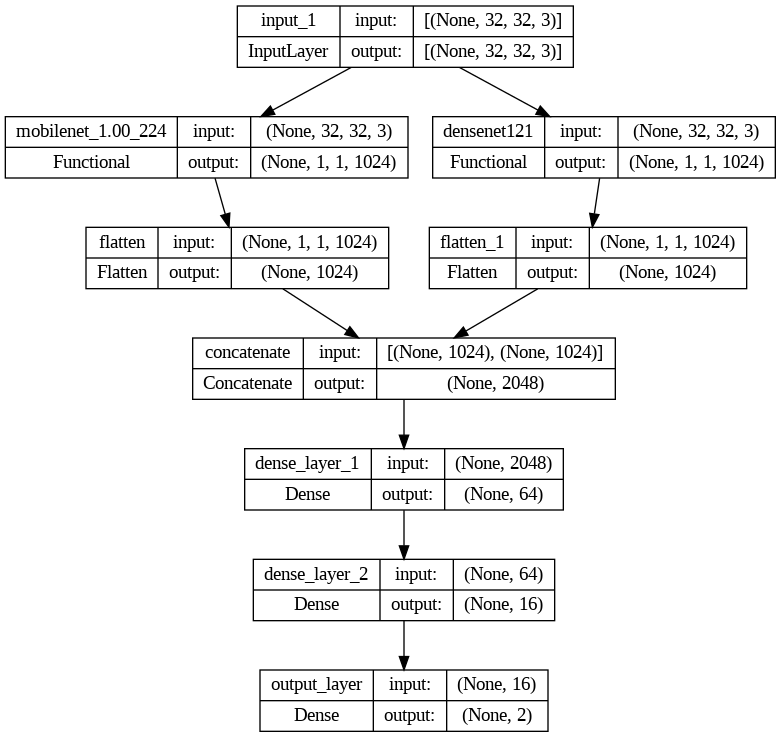

In [ ]:
tf.keras.utils.plot_model(hybridModel, show_shapes=True)

##Initialize Tensorboard

In [ ]:
import tensorflow as tf
%load_ext tensorboard
import datetime

# Clear any logs from previous runs
!rm -rf ./logs/

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

##Model Training

In [ ]:
history = hybridModel.fit(X_train, Y_train,  batch_size=128, #steps_per_epoch = 100,
                    epochs=25, validation_data= (X_test, Y_test))#, callbacks=[tensorboard_callback])

Epoch 1/25
2380/2380 [==============================] - 453s 147ms/step - loss: 0.2204 - accuracy: 0.9156 - auc: 0.9674 - prc: 0.9629 - val_loss: 0.2996 - val_accuracy: 0.9013 - val_auc: 0.9427 - val_prc: 0.9288
Epoch 2/25
2380/2380 [==============================] - 306s 129ms/step - loss: 0.1938 - accuracy: 0.9223 - auc: 0.9731 - prc: 0.9694 - val_loss: 0.4709 - val_accuracy: 0.8832 - val_auc: 0.9066 - val_prc: 0.8837
Epoch 3/25
2380/2380 [==============================] - 303s 127ms/step - loss: 0.1891 - accuracy: 0.9240 - auc: 0.9739 - prc: 0.9703 - val_loss: 0.2604 - val_accuracy: 0.9045 - val_auc: 0.9551 - val_prc: 0.9458
Epoch 4/25
2380/2380 [==============================] - 326s 137ms/step - loss: 0.1782 - accuracy: 0.9291 - auc: 0.9763 - prc: 0.9728 - val_loss: 0.2252 - val_accuracy: 0.9214 - val_auc: 0.9655 - val_prc: 0.9589
Epoch 5/25
2380/2380 [==============================] - 319s 134ms/step - loss: 0.1678 - accuracy: 0.9339 - auc: 0.9782 - prc: 0.9748 - val_loss: 0.2898

# Classification Report


In [ ]:
# Test Predictions
preds = hybridModel.predict(X_test, verbose=1)

# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = y_test

# Classification Report

from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,classification_report, roc_auc_score, roc_curve, confusion_matrix, auc ,matthews_corrcoef
print("Report of the result of Dynamic model : \n Confusion matrix : \n {} \n\nAccuracy Score:{}% \n\nPrecision Score:{}% \n\nRecall Score: {}% \n\nf1 score Score: {}%  \n\nmcc: {}%\n\nClassification Report : \n  {}".format(
      confusion_matrix(y_test, y_pred),
      round(accuracy_score(y_test, y_pred),3)*100 ,
      round(precision_score(y_test, y_pred),3)*100,
      round(recall_score(y_test, y_pred),3)*100,
      round(f1_score(y_test, y_pred),3)*100,
      round(matthews_corrcoef(y_test, y_pred),3)*100,
      classification_report(y_test, y_pred)))
'''
# Test Predictions
preds = hybridModel.predict(X_test, verbose=1)

# Take the highest probability scores to get index of predictions for test images
y_pred = np.argmax(preds, axis=1)

# Get labels of test images
y_true = y_test

# Classification Report

from sklearn.metrics import classification_report
report = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])
print(report)
'''

4080/4080 [==============================] - 107s 25ms/step
Report of the result of Dynamic model : 
 Confusion matrix : 
 [[103930   2700]
 [  3736  20163]] 

Accuracy Score:95.1% 

Precision Score:88.2% 

Recall Score: 84.39999999999999% 

f1 score Score: 86.2%  

mcc: 83.3%

Classification Report : 
                precision    recall  f1-score   support

           0       0.97      0.97      0.97    106630
           1       0.88      0.84      0.86     23899

    accuracy                           0.95    130529
   macro avg       0.92      0.91      0.92    130529
weighted avg       0.95      0.95      0.95    130529



"\n# Test Predictions\npreds = hybridModel.predict(X_test, verbose=1)\n\n# Take the highest probability scores to get index of predictions for test images\ny_pred = np.argmax(preds, axis=1)\n\n# Get labels of test images\ny_true = y_test\n\n# Classification Report\n\nfrom sklearn.metrics import classification_report\nreport = classification_report(y_true=y_true, y_pred=y_pred, target_names=['negative', 'positive'])\nprint(report)\n"

##Save Model

In [ ]:
hybridModel.save("hybridModel_1")

##Save Model History

In [ ]:
'''
import pickle
with open('/trainHistoryDict', "rb") as file_pi:
    history = pickle.load(file_pi)
    '''

'\nimport pickle\nwith open(\'/trainHistoryDict\', "rb") as file_pi:\n    history = pickle.load(file_pi)\n    '

#PLot model loss and accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

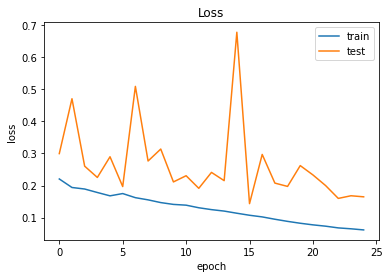

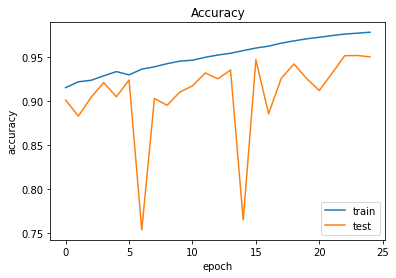

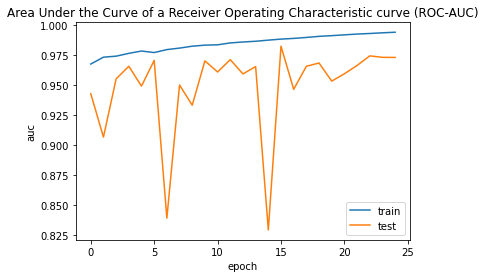

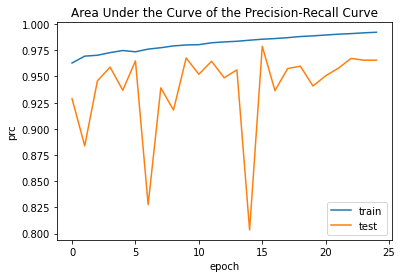

In [ ]:
#plot loss and accuracy
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'upper right')
plt.show

plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

'''
plt.figure(3)
plt.plot(history.history['tp'])
plt.plot(history.history['val_tp'])
plt.title("TruePositives")
plt.ylabel("TruePositives")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

plt.figure(4)
plt.plot(history.history['fp'])
plt.plot(history.history['val_fp'])
plt.title("FalsePositives")
plt.ylabel("FalsePositives")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

plt.figure(5)
plt.plot(history.history['tn'])
plt.plot(history.history['val_tn'])
plt.title("TrueNegatives")
plt.ylabel("TrueNegatives")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

plt.figure(6)
plt.plot(history.history['fn'])
plt.plot(history.history['val_fn'])
plt.title("FalseNegatives")
plt.ylabel("FalseNegatives")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

plt.figure(7)
plt.plot(history.history['recall'])
plt.plot(history.history['val_recall'])
plt.title("recall")
plt.ylabel("recall")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

plt.figure(8)
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title("precision")
plt.ylabel("precision")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

'''

plt.figure(9)
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title("Area Under the Curve of a Receiver Operating Characteristic curve (ROC-AUC)")
plt.ylabel("auc")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

plt.figure(10)
plt.plot(history.history['prc'])
plt.plot(history.history['val_prc'])
plt.title("Area Under the Curve of the Precision-Recall Curve")
plt.ylabel("prc")
plt.xlabel("epoch")
plt.legend(['train','test'], loc = 'lower right')
plt.show

#Load Model and Predict Classes

In [ ]:
hybridModel = tf.keras.models.load_model('hybridModel_1')

test_predictions_baseline = hybridModel.predict(X_test, batch_size=32)
test_predictions_baseline = np.argmax(test_predictions_baseline, axis=1)

4080/4080 [==============================] - 106s 25ms/step


##Confusion Matrix

Legitimate Transactions Detected (True Negatives):  103930
Legitimate Transactions Incorrectly Detected (False Positives):  2700
Fraudulent Transactions Missed (False Negatives):  3736
Fraudulent Transactions Detected (True Positives):  20163
Total Fraudulent Transactions:  23899


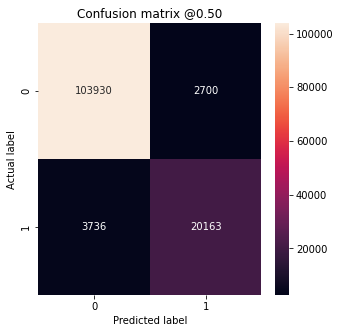

In [ ]:


def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

plot_cm(y_test, test_predictions_baseline)

##Model Evaluation

In [ ]:
baseline_results = hybridModel.evaluate(X_test, Y_test,
                                  batch_size=128, verbose=0)
for name, value in zip(hybridModel.metrics_names, baseline_results):
  print(name, ': ', value)
print()

loss :  0.16469255089759827
accuracy :  0.9506929516792297
auc :  0.9729018211364746
prc :  0.9655462503433228



##Plot Sample Prediction

1/1 [==============================] - 0s 43ms/step
Predicted Value using  cnn model 0
True Value 0


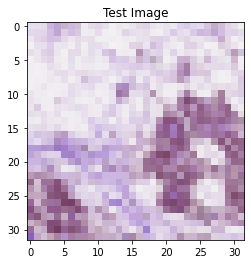

In [ ]:
def img_plot(arr,index=0):
    plt.title('Test Image')
    plt.imshow(arr[index])

index = 90
img_plot(X_test, index)

input = X_test[index:index+1]
pred = hybridModel.predict(input)[0].argmax()
label = Y_test[index].argmax()
print('Predicted Value using  cnn model',pred)
print("True Value",label)